# **Dragon Real Estate - Price Predictor**

## *Problem Statement:*  
There is a real estate company called Dragon Real Estate whose CEO is Mr. Joseph. He is worried due to the persistent wrong predictions made by his so called manual experts regarding the house prices at Boston. As a result, he now decides to stop relying on their predictions and calls Mr. Jha, a Machine Learning Engineer to solve this problem. How will he solve this problem?   

### Importing Necessary Libraries

In [1]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump, load
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np

## **Step-1: Loading a Dataset**

There are 14 attributes in each case of the dataset given by Mr. Joseph. They are:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000 dollars
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)(Bk - 0.63) where Bk is the proportion of blacks by town
13. LSTAT - percentage of lower status of the population
14. MEDV - Median value of owner-occupied homes in 1000 dollars

In [2]:
housing = pd.read_csv("Boston_Housing.csv")

## **Step-2: Insights of the Dataset**



In [3]:
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
housing.describe()              # Returns a dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
housing.info()                  # Returns a NoneType

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Calculating the Pearson Correlation coefficient of all the series w.r.t. our MEDV

In [6]:
corr_matrix = housing.corr()                             # Returns a dataframe
corr_matrix["MEDV"].sort_values(ascending=False)         # Returns a series

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

### Plotting the scatter plot of Correlated features with MEDV present in the Dataframe

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='RM', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='PTRATIO'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='PTRATIO'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

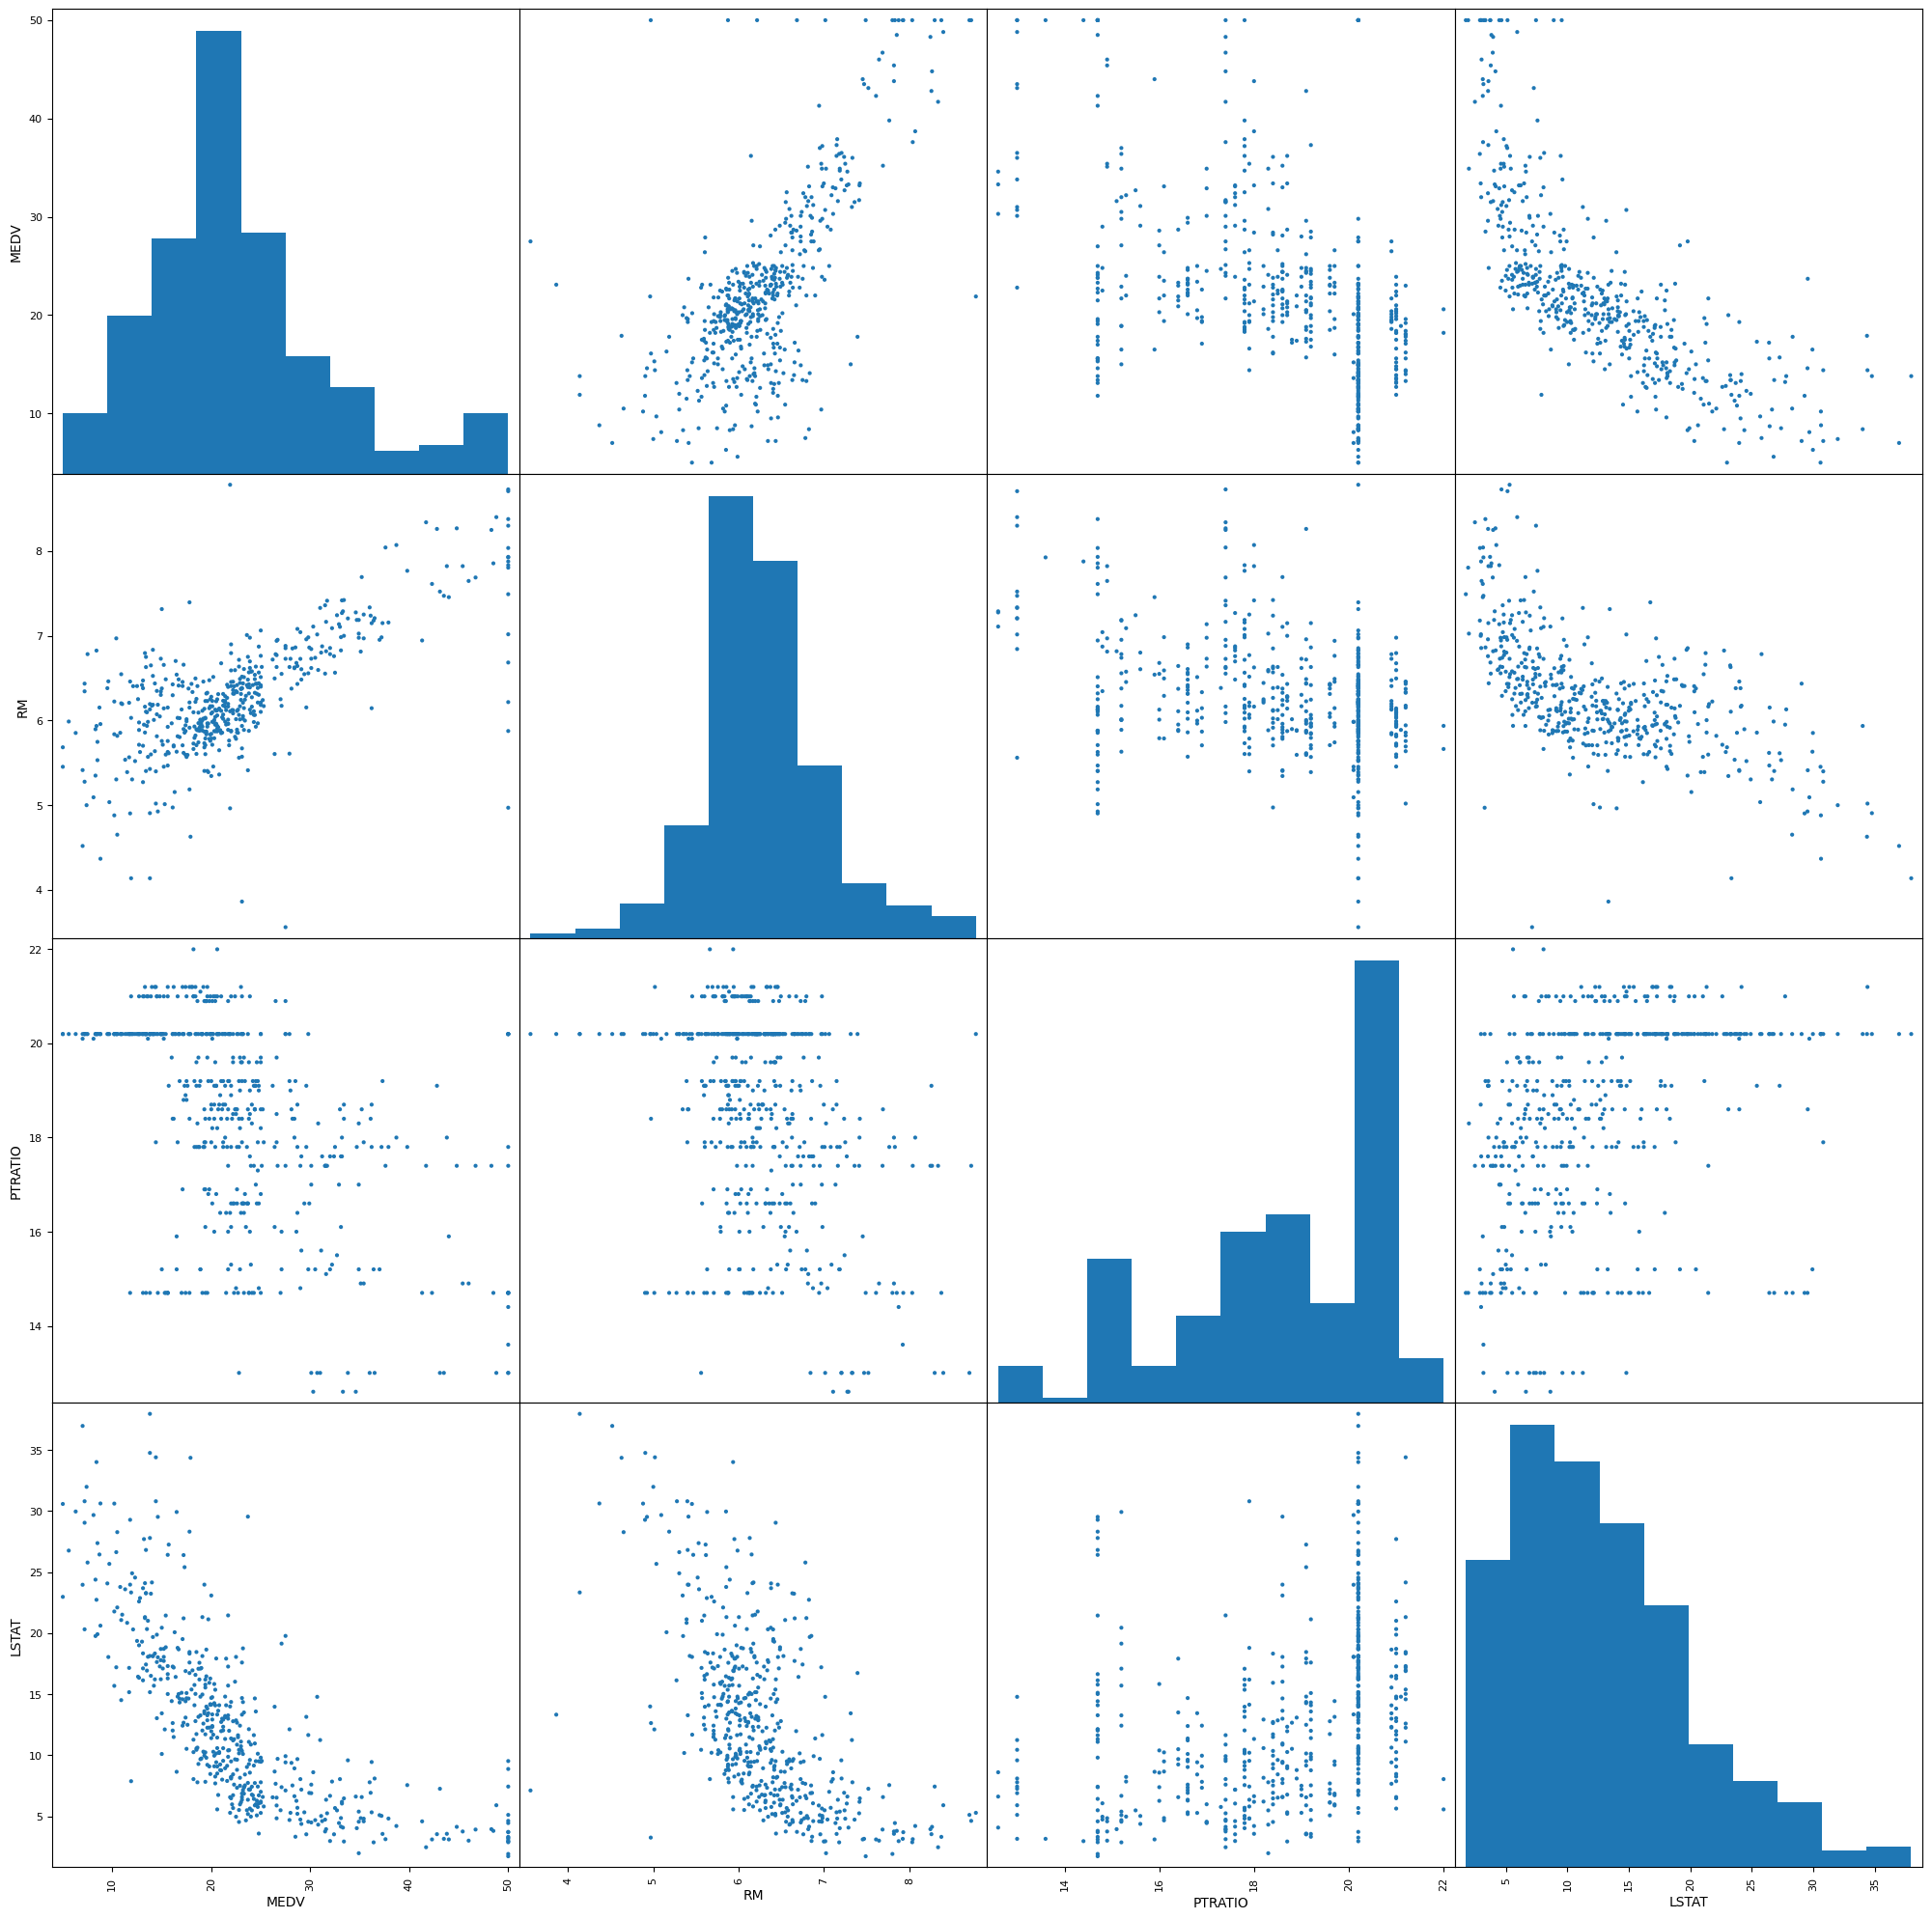

In [7]:
# Only those features are taken for scatter plot which show (correlation >= 0.5) or (correlation <= -0.5) with MEDV
scatter_matrix(housing[["MEDV", "RM", "PTRATIO","LSTAT"]], figsize=(25,25), alpha=1)           # Returns a numpy ndarray

### Plotting the histogram of Each Series present in the Dataframe

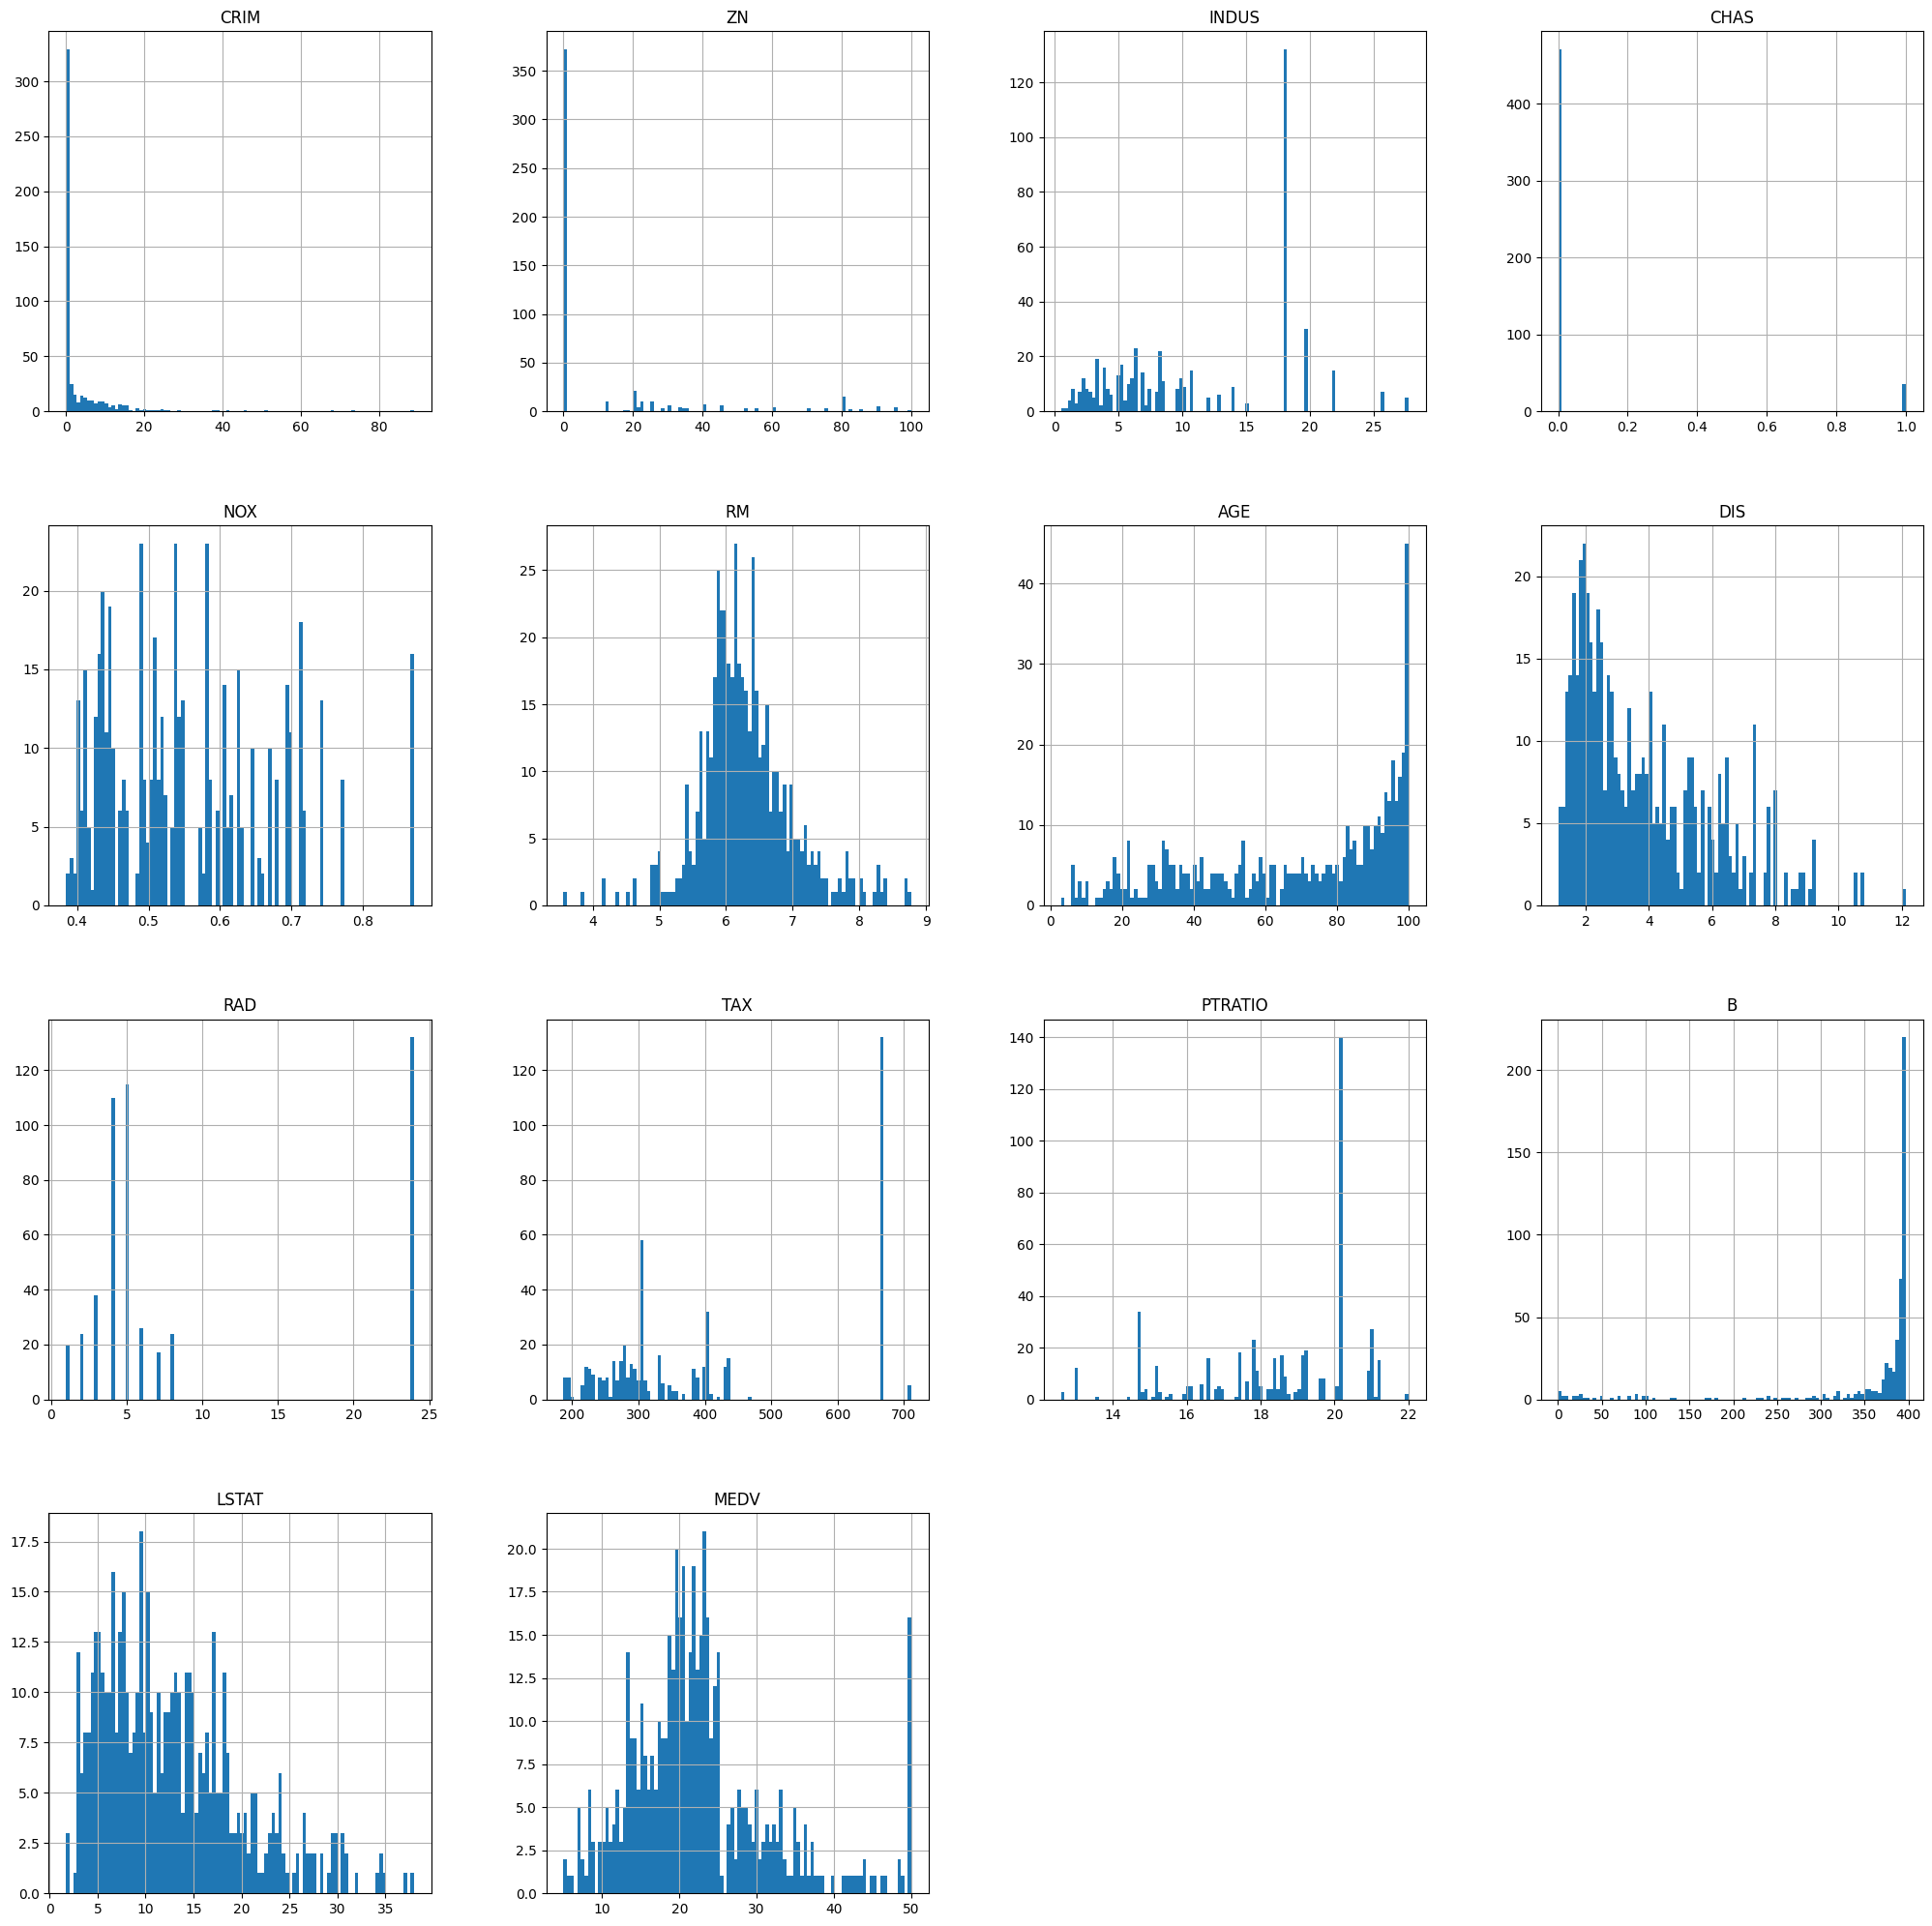

In [8]:
x = housing.hist(bins=100, figsize = (25,25))                                   # Returns a numpy ndarray

In [9]:
housing["CHAS"].value_counts()                                                  # Returns a series

0    471
1     35
Name: CHAS, dtype: int64

### The following insights about the dataset given by Mr. Jospeph have been found

1. The size of the dataframe is 506 x 14 where first thirteen series are features and the last series(MEDV) is label.
2. There are no null values in the label so no need to use median strategy explicitly.
3. The features need to be scaled as all of them have different minimum and maximum values.
4. The correlation between MEDV and RM, PTRATIO LSTAT are considerable as shown by their scatter plots so these are the features that affect the house price primarily.
5. The CHAS histogram plot shows a categorical distribution so this is the reference for stratified shuffling of training data.

## **Step-3: Stratified Shuffle Splitting of Training and Test Data**
It splits the dataset into training and test sets by giving their respective indices. Its random state parameter ensures that after the first stratified shuffle split dataset could not be shuffled randomly again so that our machine learns on our training data only. This stratified shuffling split is made by preserving the percentage of samples for each class in a reference series.

In [10]:
slicer = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indices, test_indices in slicer.split(housing, housing["CHAS"]):
    train_set = housing.iloc[train_indices]
    test_set = housing.iloc[test_indices]
x_train = train_set.drop(["MEDV"], axis=1)
y_train = train_set["MEDV"]
x_test = test_set.drop(["MEDV"], axis=1)
y_test = test_set["MEDV"]

In [11]:
x_train["CHAS"].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [12]:
print(f"Percentage of 0 in training dataset is {376 * 100 /(376 + 28)}")

Percentage of 0 in training dataset is 93.06930693069307


In [13]:
x_test["CHAS"].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [14]:
print(f"Percentage of 0 in test dataset is {95 * 100 / (95 +7 )}")

Percentage of 0 in test dataset is 93.13725490196079


## **Step-4: Data Preprocessing- Null Values Treatment and Features Scaling**

**To treat the null values, we have three options:**
1. Remove the entire row provided you have a large number of rows in the dataset.
2. Remove the entire feature provided it doesn't affect your label.
3. Replace the null values by the mean(average) or median(middlemost value when arranged in ascending or descending order) of the associated series.

**Feature Scaling:**

It is done to transform the features of a dataset onto a common scale, making it easier to compare features thereby speeds up convergence and reduces computational resources usage.

In [15]:
"""
Here, we assume our label of the dataset contains non-null values which is and although our features have no null values we 
use SimpleImputer so that in the future if more features are added then it will take care of null values if any
"""
pre_processor = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())
])
x_train_pp = pre_processor.fit_transform(x_train)  

print(type(x_train_pp))
print(x_train_pp.shape)
print("\n", x_train_pp)
print("\n", x_train)

<class 'numpy.ndarray'>
(404, 13)

 [[-0.43942006  3.12628155 -1.12165014 ... -0.97491834  0.41164221
  -0.86091034]
 [-0.44352175  3.12628155 -1.35893781 ... -0.69277865  0.39131918
  -0.94116739]
 [ 0.15682292 -0.4898311   0.98336806 ...  0.81196637  0.44624347
   0.81480158]
 ...
 [-0.43525657 -0.4898311  -1.23083158 ... -0.22254583  0.41831233
  -1.27603303]
 [ 0.14210728 -0.4898311   0.98336806 ...  0.81196637 -3.15239177
   0.73869575]
 [-0.43974024 -0.4898311   0.37049623 ... -0.97491834  0.41070422
   0.09940681]]

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
254  0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348  0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476  4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326  0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   
..       ...   ...    ...   ... 

## **Step-5: Selecting the Most Appropriate Model**

In [16]:
""" 
Results of the tried Models namely-
1. LinearRegression()
2. DecisionTreeRegressor()
3. RandomForestRegressor()
have been saved in Models.txt file
"""
model = RandomForestRegressor()

model.fit(x_train_pp, y_train)
sample_features = x_train.iloc[:10]                                     # iloc is an index based access 
sample_true_labels = y_train.iloc[:10]                                  # loc is a label based access
sample_features_pp = pre_processor.transform(sample_features)
sample_predicted_labels = model.predict(sample_features_pp)
print(f"True Prices in 1000$ : {list(sample_true_labels)}")
print(f"Predicted Prices in 1000$ : {sample_predicted_labels}")

True Prices in 1000$ : [21.9, 24.5, 16.7, 23.1, 23.0, 17.2, 24.4, 27.5, 9.5, 31.6]
Predicted Prices in 1000$ : [22.213 25.32  16.625 23.299 23.639 16.745 24.483 26.607 10.485 32.055]


## **Step-6: Checking whether the Model is Overfitted or not**

![Image](https://www.gstatic.com/education/formulas2/553212783/en/mean_squared_error.svg)

where, $\mathrm{MSE}$	=	mean squared error,
       ${n}$	=	number of data points,
       $Y_{i}$	=	observed values,
       $\hat{Y}_{i}$	=	predicted values

In [17]:
predictions = model.predict(x_train_pp)
MSE = mean_squared_error(y_train, predictions)
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) in 1000 $ is {RMSE}")
if RMSE == 0:
    print("The Model is Overfitted")
else:
    print("The Model is not Overfitted")

The Root Mean Squared Error(RMSE) in 1000 $ is 1.1936287453321348
The Model is not Overfitted


## **Step-7: Smaller the Cross Validation Score, Better is the Model**

In [18]:
MSE = cross_val_score(model, x_train_pp, y_train, cv=10, scoring="neg_mean_squared_error")
RMSE = np.sqrt(-MSE)
print(f"Mean RMSE in 1000 $ is {np.mean(RMSE)}")
print(f"Standard Deviation of RMSE in 1000 $ is {np.std(RMSE)}")
print(f"RMSE corresponding to each of the 10 folds in 1000 $ are: {RMSE}")

Mean RMSE in 1000 $ is 3.3198039703121176
Standard Deviation of RMSE in 1000 $ is 0.6636217902300917
RMSE corresponding to each of the 10 folds in 1000 $ are: [2.98043085 2.66679702 4.44376597 2.59288718 3.75148833 2.55868237
 4.44930431 3.24385582 3.16835296 3.34247491]


## **Step-8: Saving the Final Model using Joblib**

In [19]:
# dump(model, "Model.joblib")
# dump(pre_processor, "Pre_processor.joblib")

['Pre_processor.joblib']

## **Step-9: Testing the Model** 

In [20]:
x_test_pp = pre_processor.transform(x_test)
final_predictions = model.predict(x_test_pp)
final_MSE = mean_squared_error(y_test, final_predictions)
final_RMSE = np.sqrt(final_MSE)
print(f"The RMSE in 1000 $ is {final_RMSE}")


print(f"\n\n\n{type(final_predictions)}")
print(type(x_test_pp))
print(x_test_pp.shape)
print("\n", x_test_pp)
print("\n", x_test)

The RMSE in 1000 $ is 2.9611189839746226



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(102, 13)

 [[-0.44228927 -0.4898311  -1.37640684 ... -1.21003475  0.38110555
  -0.57309194]
 [ 1.76329132 -0.4898311   0.98336806 ...  0.81196637  0.42050096
   1.24376169]
 [-0.36938851 -0.4898311  -0.74897749 ... -0.50468552  0.45343469
  -0.71838488]
 ...
 [-0.43875128  0.45939847 -0.83049963 ... -0.78682521  0.45343469
  -1.0394131 ]
 [-0.43651996 -0.4898311   2.08246124 ...  0.29471027  0.25301836
   0.20457123]
 [-0.43169386 -0.4898311   0.37049623 ... -0.97491834  0.45343469
   0.70963717]]

          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
342   0.02498   0.0   1.89     0  0.518  6.540   59.7  6.2669    1  422   
379  17.86670   0.0  18.10     0  0.671  6.223  100.0  1.3861   24  666   
223   0.61470   0.0   6.20     0  0.507  6.618   80.8  3.2721    8  307   
219   0.11425   0.0  13.89     1  0.550  6.373   92.4  3.3633    5  276   
48    0.25387   0.0   6.91 